In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px



In [2]:
df = pd.read_csv('database.csv')

df.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [3]:
df.shape

(11341, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  object 
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

In [5]:
df = df.rename(columns={'historical_popularity_index': 'HPI'})
df.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,HPI
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [6]:
df.isna().sum()


article_id              0
full_name               0
sex                     0
birth_year              0
city                    0
state                9169
country                33
continent              30
latitude             1047
longitude            1047
occupation              0
industry                0
domain                  0
article_languages       0
page_views              0
average_views           0
HPI                     0
dtype: int64

In [75]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [7]:
data = df.drop(columns=['state', 'latitude', 'longitude'])
data.head()

,article_id,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,page_views,average_views,HPI
0,308,Aristotle,Male,-384,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,Greece,Europe,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [8]:
data0 = data
data1 = data.copy()
data1

,article_id,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,page_views,average_views,HPI
0,308,Aristotle,Male,-384,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,Greece,Europe,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11336,5891391,Sean St Ledger,Male,1984,Solihull,United Kingdom,Europe,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346
11337,5322451,Saina Nehwal,Female,1990,Hisar,India,Asia,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122
11338,33525706,Rūta Meilutytė,Female,1997,Kaunas,Lithuania,Europe,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821
11339,22938476,Vladimír Weiss,Male,1989,Bratislava,Slovakia,Europe,Soccer Player,Team Sports,Sports,27,12479,462,10.2495


In [9]:
data['birth_year_BC'] = data['birth_year']
data['birth_year_BC'] = pd.to_numeric(data['birth_year_BC'], errors='coerce')
data['birth_year_BC'] = data['birth_year_BC'].apply(lambda x: f"{int(abs(x))} BC" if pd.notnull(x) and x < 0 else int(x) if pd.notnull(x) else 'Unknown')

data

,article_id,full_name,sex,birth_year,city,country,continent,occupation,industry,domain,article_languages,page_views,average_views,HPI,birth_year_BC
0,308,Aristotle,Male,-384,Stageira,Greece,Europe,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938,384 BC
1,22954,Plato,Male,-427,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888,427 BC
2,1095706,Jesus Christ,Male,-4,Judea,Israel,Asia,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981,4 BC
3,25664190,Socrates,Male,-469,Athens,Greece,Europe,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521,469 BC
4,783,Alexander the Great,Male,-356,Pella,Greece,Europe,Military Personnel,Military,Institutions,138,48358148,350421,31.5840,356 BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11336,5891391,Sean St Ledger,Male,1984,Solihull,United Kingdom,Europe,Soccer Player,Team Sports,Sports,28,380965,13606,11.1346,1984
11337,5322451,Saina Nehwal,Female,1990,Hisar,India,Asia,Athlete,Individual Sports,Sports,26,2255010,86731,10.6122,1990
11338,33525706,Rūta Meilutytė,Female,1997,Kaunas,Lithuania,Europe,Swimmer,Individual Sports,Sports,32,342719,10710,10.3821,1997
11339,22938476,Vladimír Weiss,Male,1989,Bratislava,Slovakia,Europe,Soccer Player,Team Sports,Sports,27,12479,462,10.2495,1989


In [10]:
data.shape

(11341, 15)

In [11]:
data.isna().sum()

article_id            0
full_name             0
sex                   0
birth_year            0
city                  0
country              33
continent            30
occupation            0
industry              0
domain                0
article_languages     0
page_views            0
average_views         0
HPI                   0
birth_year_BC         0
dtype: int64

In [12]:
data['country'] = data['country'].fillna(0)
missing_countries = data[data['country'] == 0]
missing_conuntries_cities = missing_countries['city'].drop_duplicates()
print("Distinct city values for rows that have missing country values:")
print(missing_conuntries_cities)


Distinct city values for rows that have missing country values:
1157         Victoria Peak
2115      Byzantine Empire
2307                Lisala
2390                Yangon
3206        Ottoman Empire
3289              Tórshavn
3535             Podgorica
4450               Cetinje
5665           Saint-Denis
5684              Petnjica
5862          Lamma Island
6300               Kyaukse
6810              Manatuto
7106             Paungdale
7154            Bongoville
7185               Natmauk
7534                  Dili
7627     Ngapudaw Township
7970               Kowloon
8077            Libreville
8599                Mouila
8720              Kinshasa
9282        Fizi Territory
9720                Nikšić
10287             Mbandaka
Name: city, dtype: object


In [13]:
!pip install geopy


In [14]:
from geopy.geocoders import OpenCage

geolocator = OpenCage(api_key='fb47bdcffcd44d6f879746367a244729')

cities = missing_conuntries_cities
missing_countries = []
countries = []
city_country_mapping = {}

for city in cities:
    
    location = geolocator.geocode(city, language='en')
    if location is not None:
        country = location.raw['components']['country']
        countries.append(country)
        city_country_mapping[city] = country
    else:
        missing_countries.append(city)
        city_country_mapping[city] = None

#print(countries)
print("Country hasn't been found for cities:")
print(missing_countries)

city_country_mapping['Ngapudaw Township'] = 'Myanmar'
city_country_mapping['Fizi Territory'] = 'Democratic Republic of the Congo'

city_country_mapping['Byzantine Empire'] = 'Byzantine Empire'
city_country_mapping['Ottoman Empire'] = 'Ottoman Empire'

print("\n\n\nDictionary for city-country mapping:")
print(city_country_mapping)

Country hasn't been found for cities:
['Ngapudaw Township', 'Fizi Territory']



Dictionary for city-country mapping:
{'Victoria Peak': 'China', 'Byzantine Empire': 'Byzantine Empire', 'Lisala': 'Democratic Republic of the Congo', 'Yangon': 'Myanmar', 'Ottoman Empire': 'Ottoman Empire', 'Tórshavn': 'Faroe Islands', 'Podgorica': 'Montenegro', 'Cetinje': 'Montenegro', 'Saint-Denis': 'France', 'Petnjica': 'Montenegro', 'Lamma Island': 'China', 'Kyaukse': 'Myanmar', 'Manatuto': 'East Timor', 'Paungdale': 'Myanmar', 'Bongoville': 'Gabon', 'Natmauk': 'Myanmar', 'Dili': 'India', 'Ngapudaw Township': 'Myanmar', 'Kowloon': 'China', 'Libreville': 'Gabon', 'Mouila': 'Gabon', 'Kinshasa': 'Democratic Republic of the Congo', 'Fizi Territory': 'Democratic Republic of the Congo', 'Nikšić': 'Montenegro', 'Mbandaka': 'Democratic Republic of the Congo'}


In [15]:
data['country'] = data['country'].fillna(data['city'].map(city_country_mapping))


In [16]:
data.isna().sum()

article_id            0
full_name             0
sex                   0
birth_year            0
city                  0
country               0
continent            30
occupation            0
industry              0
domain                0
article_languages     0
page_views            0
average_views         0
HPI                   0
birth_year_BC         0
dtype: int64

In [17]:
data['continent'] = data['continent'].fillna(0)
missing_continent = data[data['continent'] == 0]
missing_continent_cities = missing_continent['full_name'].drop_duplicates()
print("Distinct city values for rows that have missing continent values:")
print(missing_continent_cities)


Distinct city values for rows that have missing continent values:
13                      Abraham
34                       Euclid
54                        Aesop
105              Judas Iscariot
165                       Khufu
250     Marcus Vitruvius Pollio
272            Romulus Augustus
300                   Lucretius
332                Thutmose III
340             Ptolemy I Soter
354                   Vitellius
636                Julius Nepos
704       Cambyses II of Persia
1112              Saint Stephen
1150                      Livia
1397           Pope Marcellus I
1481            Pope Boniface I
1490                  Parmenion
1626            Pope Sixtus III
1636             Pope Eutychian
1794              Pope Siricius
1805            Pope Benedict I
1901                      Terah
2035               Pope Pontian
2056              Kaspar Hauser
2080             Pope Cornelius
2124              Pope Liberius
3214              Zodiac Killer
3291        Antigonus III Doson
7757  

In [18]:
character_continent_mapping = {
    'Abraham' : 'Asia',
    'Euclid' : 'Europe',
    'Aesop' : 'Unknown',
    'Judas Iscariot' : 'Asia',
    'Khufu' : 'Africa',
    'Marcus Vitruvius Pollio' : 'Europe',
    'Romulus Augustus' : 'Europe',
    'Lucretius' : 'Europe',
    'Thutmose III' : 'Africa',
    'Ptolemy I Soter' : 'Europe',
    'Vitellius' : 'Europe',
    'Julius Nepos' : 'Europe',
    'Cambyses II of Persia' : 'Europe',
    'Saint Stephen' : 'Europe',
    'Livia' : 'Europe',
    'Pope Marcellus I' : 'Europe',
    'Pope Boniface I' : 'Europe',
    'Parmenion' : 'Europe',
    'Pope Sixtus III' : 'Europe',
    'Pope Eutychian' : 'Europe',
    'Pope Siricius' : 'Europe',
    'Pope Benedict I' : 'Europe',
    'Terah' : 'Asia',
    'Pope Pontian' : 'Europe',
    'Kaspar Hauser' : 'Europe',
    'Pope Cornelius' : 'Europe',
    'Pope Liberius' : 'Europe',
    'Zodiac Killer' : 'Unknown',
    'Antigonus III Doson' : 'Unknown',
    'D. B. Cooper' : 'Unknown'
}
data['continent'] = data['continent'].fillna(data['full_name'].map(character_continent_mapping))

In [19]:
data.isna().sum()

article_id           0
full_name            0
sex                  0
birth_year           0
city                 0
country              0
continent            0
occupation           0
industry             0
domain               0
article_languages    0
page_views           0
average_views        0
HPI                  0
birth_year_BC        0
dtype: int64

In [20]:
most_page_views = data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('page_views', ascending=False)[:15]
print("Top 15 historical characters with most page views:")
most_page_views

Top 15 historical characters with most page views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
1506,Michael Jackson,United States,Musician,Music,147,145250649,988100,25.5247
14,Adolf Hitler,Austria,Politician,Government,169,128368798,759579,30.5778
9097,Justin Bieber,Canada,Singer,Music,94,113558067,1208065,19.3922
2329,Barack Obama,United States,Politician,Government,200,112536577,562683,24.8890
5181,Eminem,United States,Singer,Music,83,108953700,1312695,23.2988
8048,Lady Gaga,United States,Musician,Music,133,104562647,786185,21.1045
8656,Miley Cyrus,United States,Actor,Film And Theatre,72,91947733,1277052,20.1900
7470,Cristiano Ronaldo,Portugal,Soccer Player,Team Sports,87,91677973,1053770,21.8203
8296,Rihanna,Barbados,Singer,Music,85,89939558,1058112,20.7355
22,Albert Einstein,Germany,Physicist,Natural Sciences,166,89771090,540790,30.2106


In [21]:
most_average_views = data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('average_views', ascending=False)[:15]
print("Top 15 historical characters with most average views:")
most_average_views

Top 15 historical characters with most average views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
8807,Kim Kardashian,United States,Celebrity,Media Personality,44,66670205,1515232,19.9500
9007,Lil Wayne,United States,Singer,Music,46,64484487,1401837,19.5457
5181,Eminem,United States,Singer,Music,83,108953700,1312695,23.2988
8656,Miley Cyrus,United States,Actor,Film And Theatre,72,91947733,1277052,20.1900
9097,Justin Bieber,Canada,Singer,Music,94,113558067,1208065,19.3922
9313,Nicki Minaj,Trinidad And Tobago,Singer,Music,53,59132166,1115701,18.9572
8084,The Rock,United States,Actor,Film And Theatre,45,49588797,1101973,21.0536
9673,Sasha Grey,United States,Pornographic Actor,Media Personality,37,39291394,1061930,18.2395
8296,Rihanna,Barbados,Singer,Music,85,89939558,1058112,20.7355
7470,Cristiano Ronaldo,Portugal,Soccer Player,Team Sports,87,91677973,1053770,21.8203


In [22]:
most_article_languages = data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('article_languages', ascending=False)[:15]
print("Top 15 historical characters with most article languages:")
most_article_languages

Top 15 historical characters with most article languages:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
2,Jesus Christ,Israel,Religious Figure,Religion,214,60299092,281771,31.8981
2329,Barack Obama,United States,Politician,Government,200,112536577,562683,24.8890
9326,Corbin Bleu,United States,Actor,Film And Theatre,193,6736571,34905,18.9310
6,Confucius,China,Philosopher,Philosophy,192,22363652,116477,31.3705
21,Isaac Newton,United Kingdom,Physicist,Natural Sciences,191,59909049,313660,30.2889
15,Wolfgang Amadeus Mozart,Austria,Composer,Music,177,51363334,290188,30.5146
5,Leonardo da Vinci,Italy,Inventor,Invention,174,88931135,511098,31.4644
14,Adolf Hitler,Austria,Politician,Government,169,128368798,759579,30.5778
627,Huang Xian Fan,China,Politician,Government,167,369726,2214,26.6735
22,Albert Einstein,Germany,Physicist,Natural Sciences,166,89771090,540790,30.2106


In [23]:
most_hpi = data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('HPI', ascending=False)[:25]
print("Top 25 historical characters with highest HPI:")
most_hpi

Top 25 historical characters with highest HPI:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
0,Aristotle,Greece,Philosopher,Philosophy,152,56355172,370758,31.9938
1,Plato,Greece,Philosopher,Philosophy,142,46812003,329662,31.9888
2,Jesus Christ,Israel,Religious Figure,Religion,214,60299092,281771,31.8981
3,Socrates,Greece,Philosopher,Philosophy,137,40307143,294213,31.6521
4,Alexander the Great,Greece,Military Personnel,Military,138,48358148,350421,31.5840
5,Leonardo da Vinci,Italy,Inventor,Invention,174,88931135,511098,31.4644
6,Confucius,China,Philosopher,Philosophy,192,22363652,116477,31.3705
7,Julius Caesar,Italy,Politician,Government,128,43088745,336631,31.1161
8,Homer,Turkey,Writer,Language,141,20839405,147797,31.1087
9,Pythagoras,Greece,Philosopher,Philosophy,114,26168219,229546,31.0691


In [24]:
females_data = data[data['sex'] == 'Female']
females_data_page_views = females_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('page_views', ascending=False)[:10]
print("Top 10 females with most page views:")
females_data_page_views



Top 10 females with most page views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
8048,Lady Gaga,United States,Musician,Music,133,104562647,786185,21.1045
8656,Miley Cyrus,United States,Actor,Film And Theatre,72,91947733,1277052,20.1900
8296,Rihanna,Barbados,Singer,Music,85,89939558,1058112,20.7355
8793,Selena Gomez,United States,Singer,Music,96,87742946,913989,19.9708
5587,Angelina Jolie,United States,Actor,Film And Theatre,91,68213700,749601,23.0784
8807,Kim Kardashian,United States,Celebrity,Media Personality,44,66670205,1515232,19.9500
142,Marilyn Monroe,United States,Actor,Film And Theatre,143,63671491,445255,28.3466
8559,Katy Perry,United States,Singer,Music,72,61762831,857817,20.3367
8838,Megan Fox,United States,Actor,Film And Theatre,63,59594557,945945,19.8924
9313,Nicki Minaj,Trinidad And Tobago,Singer,Music,53,59132166,1115701,18.9572


In [25]:
females_data_average_views = females_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('average_views', ascending=False)[:10]
print("Top 10 females with most average views:")
females_data_average_views


Top 10 females with most average views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
8807,Kim Kardashian,United States,Celebrity,Media Personality,44,66670205,1515232,19.9500
8656,Miley Cyrus,United States,Actor,Film And Theatre,72,91947733,1277052,20.1900
9313,Nicki Minaj,Trinidad And Tobago,Singer,Music,53,59132166,1115701,18.9572
9673,Sasha Grey,United States,Pornographic Actor,Media Personality,37,39291394,1061930,18.2395
8296,Rihanna,Barbados,Singer,Music,85,89939558,1058112,20.7355
9767,Kaley Cuoco,United States,Actor,Film And Theatre,35,33795489,965585,18.0426
9189,Kristen Stewart,United States,Actor,Film And Theatre,58,55438548,955837,19.2244
8838,Megan Fox,United States,Actor,Film And Theatre,63,59594557,945945,19.8924
9983,Emma Stone,United States,Actor,Film And Theatre,38,35516223,934637,17.5937
8793,Selena Gomez,United States,Singer,Music,96,87742946,913989,19.9708


In [26]:
females_data_article_languages = females_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('article_languages', ascending=False)[:10]
print("Top 10 females with most article languages views:")
females_data_article_languages


Top 10 females with most article languages views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
4885,Hebe Camargo,Brazil,Presenter,Media Personality,157,1264929,8057,23.4770
142,Marilyn Monroe,United States,Actor,Film And Theatre,143,63671491,445255,28.3466
8048,Lady Gaga,United States,Musician,Music,133,104562647,786185,21.1045
280,Marie Curie,Poland,Chemist,Natural Sciences,130,30874600,237497,27.6030
367,Elizabeth II of the United Kingdom,United Kingdom,Nobleman,Government,127,54551771,429542,27.3167
392,Marlene Dietrich,Germany,Actor,Film And Theatre,114,9348297,82003,27.2298
1621,Angela Merkel,Germany,Politician,Government,112,18136237,161931,25.4218
697,Sarah Bernhardt,France,Actor,Film And Theatre,112,3431777,30641,26.5274
305,Frida Kahlo,Mexico,Painter,Fine Arts,112,24591278,219565,27.5025
8303,Selena,United States,Singer,Music,107,15165285,141732,20.7211


In [27]:
females_data_HPI = females_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('HPI', ascending=False)[:15]
print("Top 15 females with highest HPI:")
females_data_HPI



Top 15 females with highest HPI:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
28,Cleopatra VII of Egypt,Egypt,Politician,Government,100,18849501,188495,30.0367
50,Nefertiti,Egypt,Companion,Companions,74,9660479,130547,29.5711
52,Jeanne d'Arc,France,Military Personnel,Military,104,27928806,268546,29.5566
60,Mary,Israel,Religious Figure,Religion,100,4043545,40435,29.3919
77,Sappho,Greece,Writer,Language,82,5492117,66977,29.1232
82,Mary Magdalene,Israel,Religious Figure,Religion,65,13657412,210114,29.0759
87,Elizabeth I of England,United Kingdom,Politician,Government,106,39290364,370664,29.0005
90,Anne Boleyn,United Kingdom,Companion,Companions,62,25342861,408756,28.9534
135,Marie Antoinette,Austria,Nobleman,Government,65,32610600,501702,28.4474
142,Marilyn Monroe,United States,Actor,Film And Theatre,143,63671491,445255,28.3466


In [28]:
males_data = data[data['sex'] == 'Male']
males_data_page_views = males_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('page_views', ascending=False)[:10]
print("Top 10 males with most page views:")
males_data_page_views



Top 10 males with most page views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
1506,Michael Jackson,United States,Musician,Music,147,145250649,988100,25.5247
14,Adolf Hitler,Austria,Politician,Government,169,128368798,759579,30.5778
9097,Justin Bieber,Canada,Singer,Music,94,113558067,1208065,19.3922
2329,Barack Obama,United States,Politician,Government,200,112536577,562683,24.8890
5181,Eminem,United States,Singer,Music,83,108953700,1312695,23.2988
7470,Cristiano Ronaldo,Portugal,Soccer Player,Team Sports,87,91677973,1053770,21.8203
22,Albert Einstein,Germany,Physicist,Natural Sciences,166,89771090,540790,30.2106
5,Leonardo da Vinci,Italy,Inventor,Invention,174,88931135,511098,31.4644
2020,Johnny Depp,United States,Actor,Film And Theatre,80,83016743,1037709,25.1155
8010,Lionel Messi,Argentina,Soccer Player,Team Sports,95,82454215,867939,21.1608


In [29]:
males_data_average_views = males_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('average_views', ascending=False)[:10]
print("Top 10 males with most average views:")
males_data_average_views


Top 10 males with most average views:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
9007,Lil Wayne,United States,Singer,Music,46,64484487,1401837,19.5457
5181,Eminem,United States,Singer,Music,83,108953700,1312695,23.2988
9097,Justin Bieber,Canada,Singer,Music,94,113558067,1208065,19.3922
8084,The Rock,United States,Actor,Film And Theatre,45,49588797,1101973,21.0536
7470,Cristiano Ronaldo,Portugal,Soccer Player,Team Sports,87,91677973,1053770,21.8203
2020,Johnny Depp,United States,Actor,Film And Theatre,80,83016743,1037709,25.1155
1506,Michael Jackson,United States,Musician,Music,147,145250649,988100,25.5247
9329,Channing Tatum,United States,Actor,Film And Theatre,36,33586668,932963,18.9155
7890,John Cena,United States,Wrestler,Individual Sports,53,48740783,919637,21.3081
9348,Paul Walker,United States,Actor,Film And Theatre,35,31764885,907568,18.8869


In [30]:
males_data_article_languages = males_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('article_languages', ascending=False)[:10]
print("Top 10 males with most article languages:")
males_data_article_languages


Top 10 males with most article languages:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
2,Jesus Christ,Israel,Religious Figure,Religion,214,60299092,281771,31.8981
2329,Barack Obama,United States,Politician,Government,200,112536577,562683,24.8890
9326,Corbin Bleu,United States,Actor,Film And Theatre,193,6736571,34905,18.9310
6,Confucius,China,Philosopher,Philosophy,192,22363652,116477,31.3705
21,Isaac Newton,United Kingdom,Physicist,Natural Sciences,191,59909049,313660,30.2889
15,Wolfgang Amadeus Mozart,Austria,Composer,Music,177,51363334,290188,30.5146
5,Leonardo da Vinci,Italy,Inventor,Invention,174,88931135,511098,31.4644
14,Adolf Hitler,Austria,Politician,Government,169,128368798,759579,30.5778
627,Huang Xian Fan,China,Politician,Government,167,369726,2214,26.6735
261,Mustafa Kemal Atatürk,Greece,Politician,Government,166,19455613,117202,27.6575


In [31]:
males_data_HPI = females_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('HPI', ascending=False)[:15]
print("Top 10 males with highest HPI:")
males_data_HPI


Top 10 males with highest HPI:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
28,Cleopatra VII of Egypt,Egypt,Politician,Government,100,18849501,188495,30.0367
50,Nefertiti,Egypt,Companion,Companions,74,9660479,130547,29.5711
52,Jeanne d'Arc,France,Military Personnel,Military,104,27928806,268546,29.5566
60,Mary,Israel,Religious Figure,Religion,100,4043545,40435,29.3919
77,Sappho,Greece,Writer,Language,82,5492117,66977,29.1232
82,Mary Magdalene,Israel,Religious Figure,Religion,65,13657412,210114,29.0759
87,Elizabeth I of England,United Kingdom,Politician,Government,106,39290364,370664,29.0005
90,Anne Boleyn,United Kingdom,Companion,Companions,62,25342861,408756,28.9534
135,Marie Antoinette,Austria,Nobleman,Government,65,32610600,501702,28.4474
142,Marilyn Monroe,United States,Actor,Film And Theatre,143,63671491,445255,28.3466


In [32]:
serbia_data = data[data['country'] == 'Serbia']

sorted_serbia_data = serbia_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('page_views', ascending=False)

top_10_page_views_serbia = sorted_serbia_data.head(10)
print("Top 10 with most page views from Serbia:")
top_10_page_views_serbia

Top 10 with most page views from Serbia:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
9837,Novak Djokovic,Serbia,Tennis Player,Individual Sports,108,15210079,140834,17.8900
119,Constantine I,Serbia,Politician,Government,96,8393354,87431,28.5648
1459,Slobodan Milošević,Serbia,Politician,Government,65,5591751,86027,25.5614
9261,Monica Seles,Serbia,Tennis Player,Individual Sports,46,5387471,117119,19.0869
9509,Nemanja Vidić,Serbia,Soccer Player,Team Sports,51,4597325,90144,18.5610
10165,Ana Ivanović,Serbia,Tennis Player,Individual Sports,54,4086255,75671,17.1890
10316,Branislav Ivanović,Serbia,Soccer Player,Team Sports,44,2797294,63575,16.8284
9518,Dejan Stanković,Serbia,Soccer Player,Team Sports,39,2653227,68031,18.5461
9474,Mateja Kežman,Serbia,Soccer Player,Team Sports,36,2503184,69533,18.6304
8998,Dragan Stojković,Serbia,Coach,Team Sports,26,2279556,87675,19.5634


In [33]:
serbia_data = data[data['country'] == 'Serbia']

sorted_serbia_data = serbia_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('average_views', ascending=False)

top_10_average_views_serbia = sorted_serbia_data.head(10)
print("Top 10 with most average views from Serbia:")
top_10_average_views_serbia

Top 10 with most average views from Serbia:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
9837,Novak Djokovic,Serbia,Tennis Player,Individual Sports,108,15210079,140834,17.8900
9261,Monica Seles,Serbia,Tennis Player,Individual Sports,46,5387471,117119,19.0869
9509,Nemanja Vidić,Serbia,Soccer Player,Team Sports,51,4597325,90144,18.5610
8998,Dragan Stojković,Serbia,Coach,Team Sports,26,2279556,87675,19.5634
119,Constantine I,Serbia,Politician,Government,96,8393354,87431,28.5648
1459,Slobodan Milošević,Serbia,Politician,Government,65,5591751,86027,25.5614
10165,Ana Ivanović,Serbia,Tennis Player,Individual Sports,54,4086255,75671,17.1890
9474,Mateja Kežman,Serbia,Soccer Player,Team Sports,36,2503184,69533,18.6304
9518,Dejan Stanković,Serbia,Soccer Player,Team Sports,39,2653227,68031,18.5461
10639,Aleksandar Kolarov,Serbia,Soccer Player,Team Sports,33,2146174,65036,15.9981


In [34]:
serbia_data = data[data['country'] == 'Serbia']

sorted_serbia_data = serbia_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('article_languages', ascending=False)

top_10_average_views_serbia = sorted_serbia_data.head(10)
print("Top 10 with most article languages from Serbia:")
top_10_average_views_serbia

Top 10 with most article languages from Serbia:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
9837,Novak Djokovic,Serbia,Tennis Player,Individual Sports,108,15210079,140834,17.8900
119,Constantine I,Serbia,Politician,Government,96,8393354,87431,28.5648
1459,Slobodan Milošević,Serbia,Politician,Government,65,5591751,86027,25.5614
10165,Ana Ivanović,Serbia,Tennis Player,Individual Sports,54,4086255,75671,17.1890
550,Constantius II,Serbia,Politician,Government,52,1206688,23206,26.8183
1146,Maximian,Serbia,Politician,Government,52,952259,18313,25.8802
9509,Nemanja Vidić,Serbia,Soccer Player,Team Sports,51,4597325,90144,18.5610
560,Decius,Serbia,Politician,Government,50,1103190,22064,26.7927
1002,Galerius,Serbia,Politician,Government,49,1002519,20460,26.0466
734,Claudius II,Serbia,Politician,Government,48,714668,14889,26.4543


In [35]:
serbia_data = data[data['country'] == 'Serbia']

sorted_serbia_data = serbia_data[['full_name', 'country', 'occupation', 'industry', 'article_languages', 'page_views', 'average_views', 'HPI']].sort_values('HPI', ascending=False)

top_15_HPI_serbia = sorted_serbia_data.head(15)
print("Top 15 with highest HPI from Serbia:")
top_15_HPI_serbia

Top 15 with highest HPI from Serbia:


,full_name,country,occupation,industry,article_languages,page_views,average_views,HPI
119,Constantine I,Serbia,Politician,Government,96,8393354,87431,28.5648
463,Jovian,Serbia,Politician,Government,47,494971,10531,27.0546
550,Constantius II,Serbia,Politician,Government,52,1206688,23206,26.8183
560,Decius,Serbia,Politician,Government,50,1103190,22064,26.7927
734,Claudius II,Serbia,Politician,Government,48,714668,14889,26.4543
854,Quintillus,Serbia,Politician,Government,42,524542,12489,26.2469
1002,Galerius,Serbia,Politician,Government,49,1002519,20460,26.0466
1013,Probus,Serbia,Politician,Government,43,580977,13511,26.0290
1127,Gratian,Serbia,Politician,Government,41,632295,15422,25.9037
1145,Licinius,Serbia,Politician,Government,44,819173,18618,25.8807


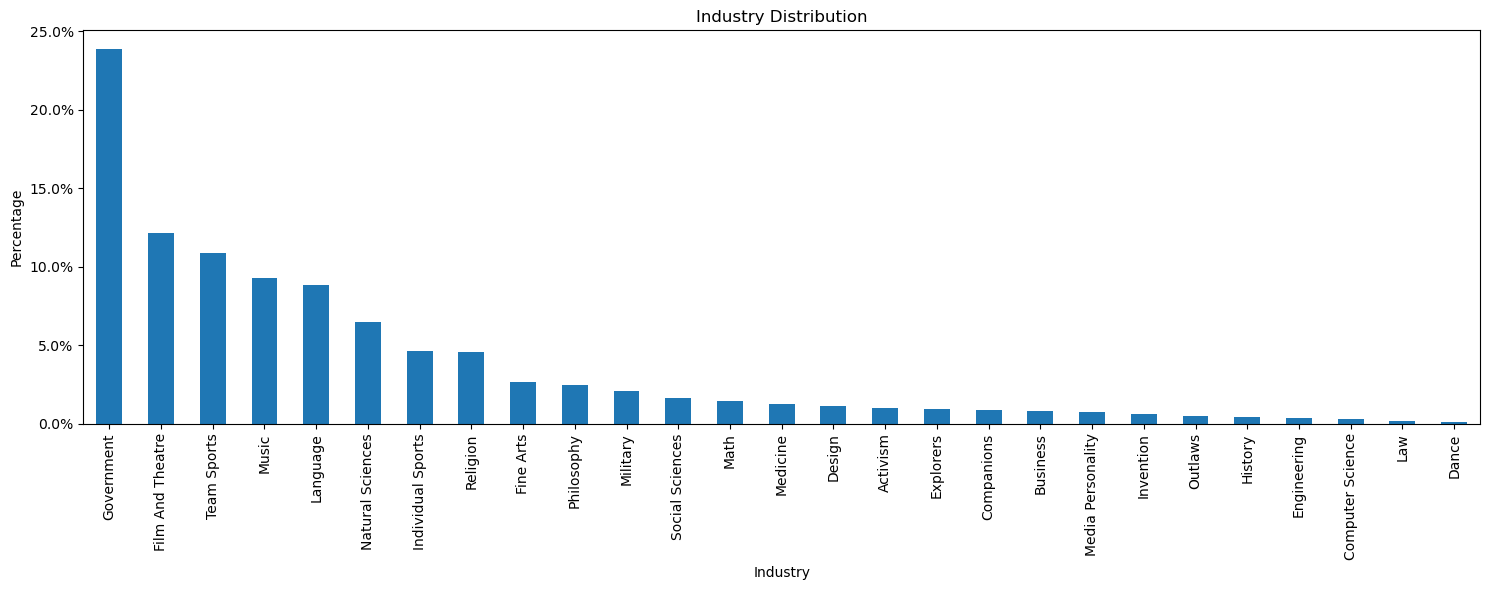

In [38]:
industry_counts = df['industry'].value_counts()

industry_percentages = industry_counts / industry_counts.sum() * 100

plt.figure(figsize=(15, 6))
industry_percentages.plot(kind='bar')

plt.xlabel('Industry')
plt.ylabel('Percentage')

plt.title('Industry Distribution')

plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)

plt.tight_layout()

plt.show()

In [39]:
gender_counts = data['sex'].value_counts()

fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, color_discrete_sequence=['lightblue', 'pink'])

fig.update_layout(
    title="Gender Distribution",
    title_font=dict(size=20),
    legend=dict(
        orientation="h",
        x=0.85,
        y=0.5,
        title=None,
    )
)

fig.show()


In [40]:
domain_counts = data['domain'].value_counts()

fig = px.pie(domain_counts, values=domain_counts.values, names=domain_counts.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Domain Distribution",
    title_font=dict(size=20),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    )
)

fig.show()


In [41]:
data['birth_year'] = pd.to_numeric(data['birth_year'], errors='coerce')

ancient_era = data[data['birth_year'] <= 476].shape[0]
middle_ages = data[(data['birth_year'] > 476) & (data['birth_year'] <= 1453)].shape[0]
new_age = data[(data['birth_year'] > 1453) & (data['birth_year'] <= 1914)].shape[0]
modern_age = data[data['birth_year'] > 1914].shape[0]

total_rows = data0.shape[0]
ancient_era_percentage = (ancient_era / total_rows) * 100
middle_ages_percentage = (middle_ages / total_rows) * 100
new_age_percentage = (new_age / total_rows) * 100
modern_age_percentage = (modern_age / total_rows) * 100

age_data = pd.DataFrame({
    'Age Category': ['Ancient Era', 'Middle Ages', 'New Age', 'Modern Age'],
    'Percentage': [ancient_era_percentage, middle_ages_percentage, new_age_percentage, modern_age_percentage]
})

fig = px.pie(age_data, values='Percentage', names='Age Category', color_discrete_sequence=px.colors.qualitative.Pastel )


fig.update_layout(
    title='Time Period Distribution',
    title_font=dict(size=20),
    legend=dict(
        orientation='h',
        x=0.5,
        y=-0.1
    )
)

fig.show()


In [76]:
continent_counts = data1['continent'].value_counts()

fig = px.pie(continent_counts, values=continent_counts.values, names=continent_counts.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Continents Distribution",
    title_font=dict(size=20),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    )
)

fig.show()


In [43]:
country_counts = data['country'].value_counts()
top_countries = country_counts.head(15)
fig = px.pie(top_countries, values=top_countries.values, names=top_countries.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Countries Distribution",
    title_font=dict(size=20),
    legend=dict(
        orientation="v",
        x=0.85,
        y=0.5,
        title=None,
    )
)

fig.show()

In [44]:
city_counts = data['city'].value_counts()
top_cities = city_counts.head(15)
fig = px.pie(top_cities, values=top_cities.values, names=top_cities.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Cities Distribution",
    title_font=dict(size=20),
    legend=dict(
        orientation="v",
        x=0.85,
        y=0.5,
        title=None,
    )
)

fig.show()

In [45]:
grouped_data = data.groupby(['domain', 'industry']).size().reset_index(name='count')

fig = px.sunburst(grouped_data, path=['domain', 'industry'], values='count', color='domain')

fig.update_layout(
    title="Domains and Industries",
    title_font=dict(size=20),
    colorway=px.colors.qualitative.Pastel, 
)

fig.update_traces(
    insidetextorientation='radial',  
    insidetextfont={'size': 16},  
    textfont={'size': 14}, 
)

fig.show()


In [46]:
hpi_sorted = data.sort_values('HPI', ascending=False)[:100]

grouped_data = hpi_sorted.groupby(['domain', 'occupation']).size().reset_index(name='count')
grouped_data['percentage'] = grouped_data['count'] / grouped_data['count'].sum() * 100

fig = px.sunburst(grouped_data, path=['domain', 'occupation'], values='count', color_discrete_sequence=px.colors.qualitative.Pastel1,
                  custom_data=['percentage'])

fig.update_traces(textinfo='label+percent entry')


fig.update_layout(
    title="Top 100 by HPI: Domains and Occupations",
    title_font=dict(size=20),
)

fig.update_traces(
    insidetextorientation='radial',  
    insidetextfont={'size': 16},  
    textfont={'size': 14}, 
)

fig.show()


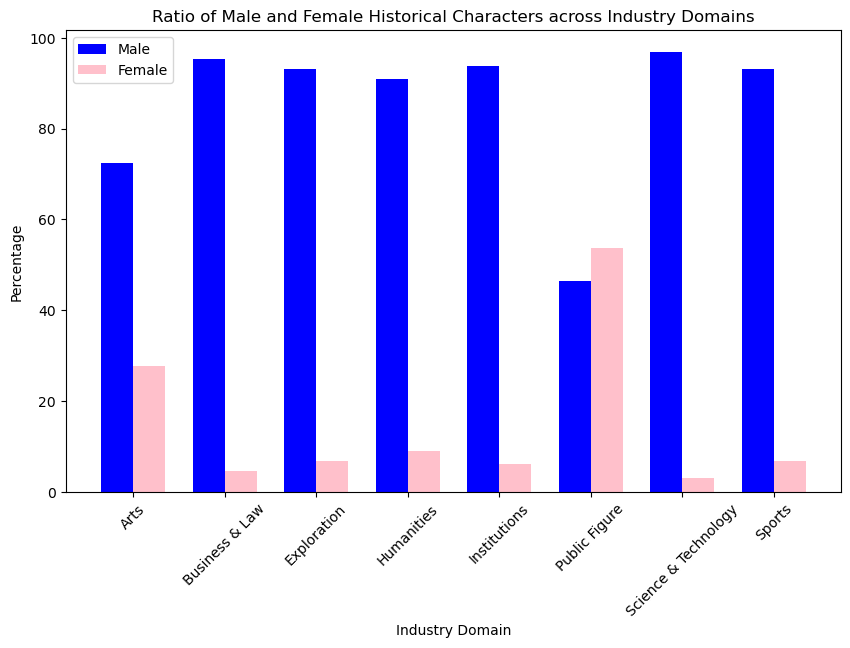

In [47]:
grouped_data = data.groupby(['domain', 'sex']).size().unstack().reset_index()

grouped_data['Total'] = grouped_data['Male'] + grouped_data['Female']

grouped_data['Percentage_Male'] = grouped_data['Male'] / grouped_data['Total'] * 100
grouped_data['Percentage_Female'] = grouped_data['Female'] / grouped_data['Total'] * 100

domains = grouped_data['domain']
num_groups = len(domains)

bar_width = 0.35
index = np.arange(num_groups)

percentages_male = grouped_data['Percentage_Male']
percentages_female = grouped_data['Percentage_Female']

plt.figure(figsize=(10, 6))

plt.bar(index, percentages_male, bar_width, label='Male', color='blue')
plt.bar(index + bar_width, percentages_female, bar_width, label='Female', color='pink')

plt.xlabel('Industry Domain')
plt.ylabel('Percentage')
plt.title('Ratio of Male and Female Historical Characters across Industry Domains')
plt.xticks(index + bar_width/2, domains, rotation=45)
plt.legend()

plt.savefig('ratio male female domains.png', dpi=300, bbox_inches='tight')
plt.show()

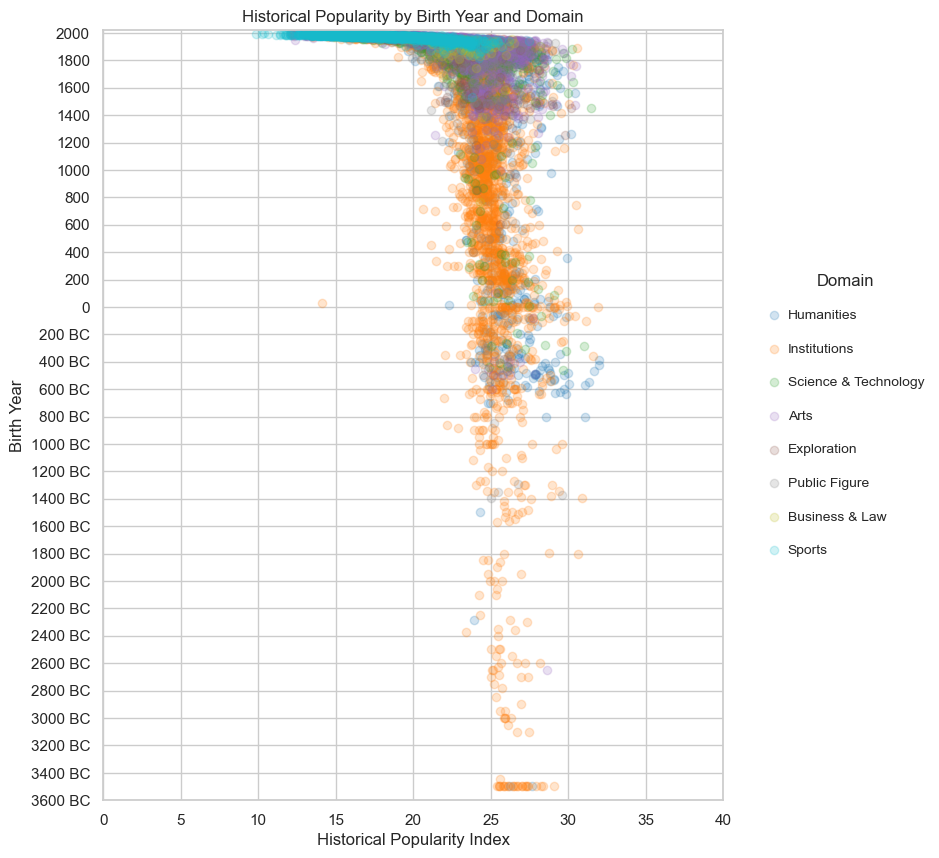

In [74]:
data1['birth_year'] = pd.to_numeric(data1['birth_year'], errors='coerce')

plt.figure(figsize=(8, 10))
domains = data1['domain'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(domains)))
for i, domain in enumerate(domains):
    plt.scatter(data1[data1['domain'] == domain]['HPI'],
                data1[data1['domain'] == domain]['birth_year'],
                color=colors[i],
                alpha=0.2,
                label=domain)
plt.ylim(-3600, 2020)
plt.xlim(0, 40)

plt.xlabel('Historical Popularity Index')
plt.ylabel('Birth Year')

yticks = np.arange(-3600, 2020, 200)
yticklabels = [f"{int(abs(y))} BC" if y < 0 else str(y) for y in yticks]
plt.yticks(yticks, yticklabels)
plt.grid(True)
plt.title('Historical Popularity by Birth Year and Domain')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False, title='Domain',
           title_fontsize='12', labelspacing=1.5, handlelength=1, handletextpad=0.5, fontsize='10')
plt.savefig('hpi scattered by year domain.png', dpi=300, bbox_inches='tight')
plt.show()

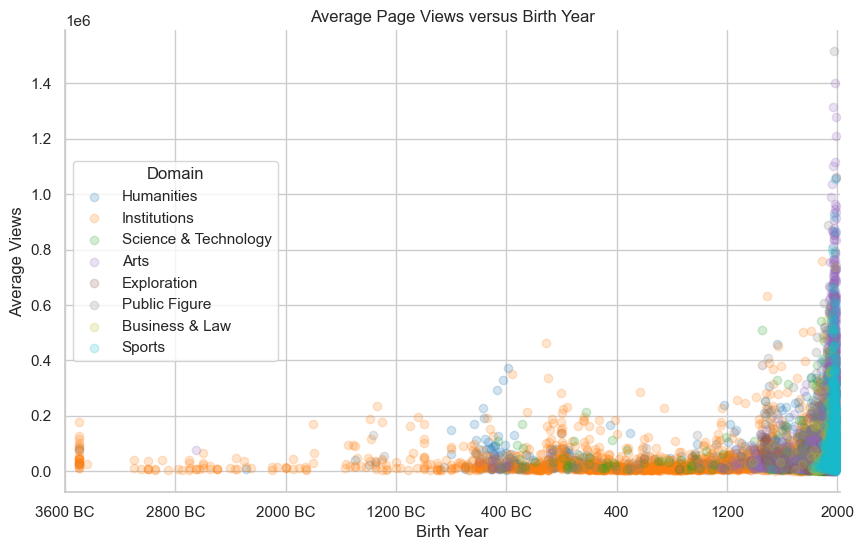

In [49]:
domains = data1['domain'].unique()

colors = plt.cm.tab10(np.linspace(0, 1, len(domains)))

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))


for i, domain in enumerate(data1['domain'].unique()):
    domain_data = data1[data1['domain'] == domain]
    plt.scatter(domain_data['birth_year'], domain_data['average_views'], label=domain, alpha=0.2, color=colors[i])


plt.xlim(-3600, 2020)
xticks = np.arange(-3600, 2020, 800)
xticklabels = [f"{int(abs(x))} BC" if x < 0 else str(x) for x in xticks]
plt.xticks(xticks, xticklabels)
plt.xlabel('Birth Year')
plt.ylabel('Average Views')
plt.title('Average Page Views versus Birth Year')
plt.legend(title='Domain', loc='center left')
plt.grid(True)
sns.despine()

plt.savefig('average_views_vs_birth_year.png', dpi=300)
plt.show()


In [78]:
ancient_era = data[data['birth_year'] <= 476]

grouped_ancient_data = ancient_era['domain'].value_counts()
fig = px.pie(grouped_ancient_data, values=grouped_ancient_data.values, names=grouped_ancient_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Ancient Era Domains Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()
middle_ages_data = data[(data['birth_year'] > 476) & (data['birth_year'] <= 1453)]

grouped_middle_ages_data = middle_ages_data['domain'].value_counts()
fig = px.pie(grouped_middle_ages_data, values=grouped_middle_ages_data.values, names=grouped_middle_ages_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="Middle Ages Domains Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()
new_age = data[(data['birth_year'] > 1453) & (data['birth_year'] <= 1914)]

grouped_new_age_data = new_age['domain'].value_counts()
fig = px.pie(grouped_new_age_data, values=grouped_new_age_data.values, names=grouped_new_age_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="New Age Domains Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1.15,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()

modern_age = data[data['birth_year'] > 1914]

grouped_new_age_data = modern_age['domain'].value_counts()
fig = px.pie(grouped_new_age_data, values=grouped_new_age_data.values, names=grouped_new_age_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="Modern Age Domains Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1.15,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)

fig.show()


In [73]:
ancient_era = data1[data1['birth_year'] <= 476]

grouped_ancient_data = ancient_era['continent'].value_counts()
fig = px.pie(grouped_ancient_data, values=grouped_ancient_data.values, names=grouped_ancient_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    title="Ancient Era Continents Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()
middle_ages_data = data1[(data1['birth_year'] > 476) & (data['birth_year'] <= 1453)]

grouped_middle_ages_data = middle_ages_data['continent'].value_counts()
fig = px.pie(grouped_middle_ages_data, values=grouped_middle_ages_data.values, names=grouped_middle_ages_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="Middle Ages Continents Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()
new_age = data1[(data1['birth_year'] > 1453) & (data['birth_year'] <= 1914)]

grouped_new_age_data = new_age['continent'].value_counts()
fig = px.pie(grouped_new_age_data, values=grouped_new_age_data.values, names=grouped_new_age_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="New Age Continents Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)
fig.show()

modern_age = data1[data1['birth_year'] > 1914]

grouped_new_age_data = modern_age['continent'].value_counts()
fig = px.pie(grouped_new_age_data, values=grouped_new_age_data.values, names=grouped_new_age_data.index, color_discrete_sequence=px.colors.qualitative.Pastel)


fig.update_layout(
    title="Modern Age Continents Distribution",
    title_font=dict(size=16),
    legend=dict(
        orientation="v",
        x=1,
        y=0.5,
        title=None,
    ),
     font=dict(
            size=10
        )
)
fig.update_layout(
    width = 400,
    height = 400,
)

fig.show()


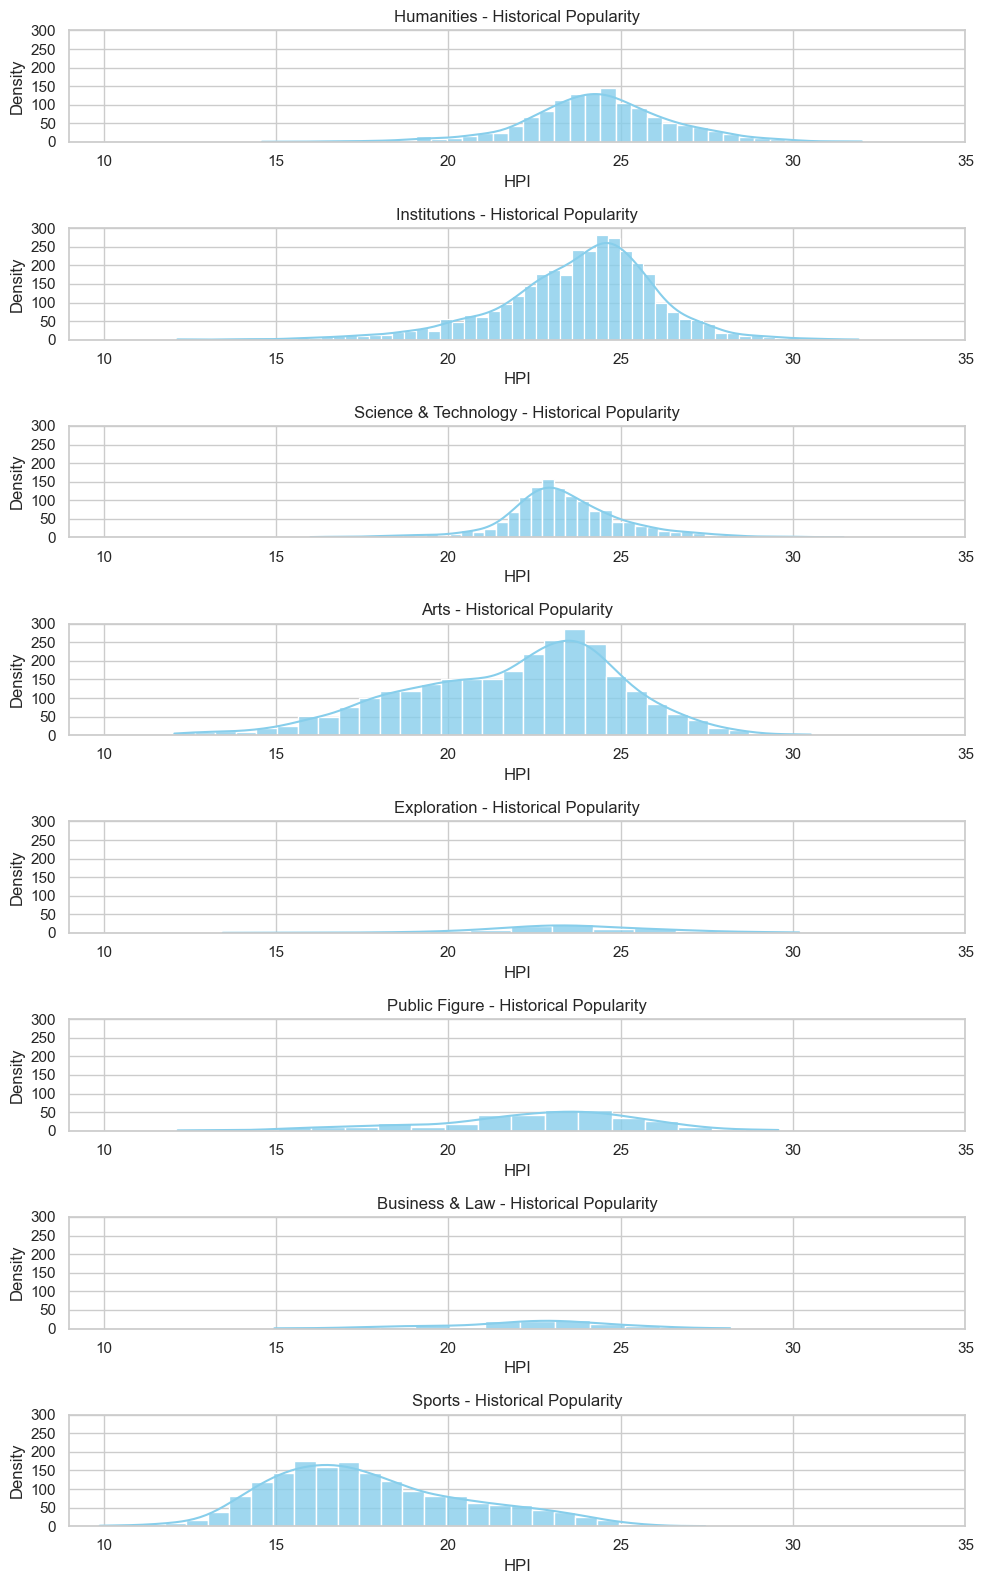

In [81]:
plt.figure(figsize=(10, 16))

for i, domain in enumerate(data1['domain'].unique()):
    domain_data = data1[data1['domain'] == domain]
    plt.subplot(len(data1['domain'].unique()), 1, i + 1)
    sns.histplot(domain_data['HPI'], kde=True, color='skyblue', alpha=0.8)
    plt.xlabel('HPI')
    plt.ylabel('Density')
    plt.title(f'{domain} - Historical Popularity', fontsize=12)
    plt.ylim(0, 300)
    plt.xlim(9, 35)

    plt.yticks(range(0, 301, 50))
    plt.grid(True)

plt.tight_layout()
plt.savefig('historical_popularity_density.png', dpi=300)
plt.show()


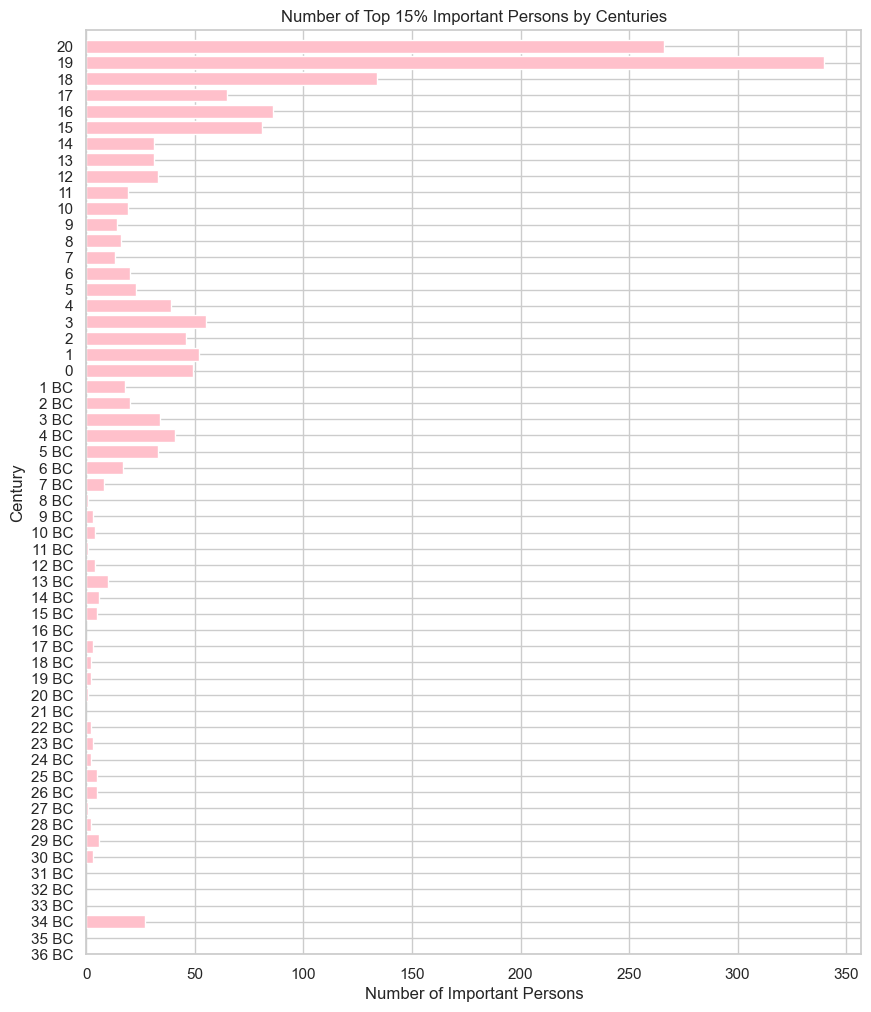

In [59]:
data1['century'] = (data1['birth_year'] // 100) + 1

sorted_data = data1.sort_values('HPI', ascending=False)
size_sorted_data = sorted_data.shape[0]
top_15 = int(np.ceil(size_sorted_data*0.15))
top_15_sorted_data = sorted_data[:top_15]

century_counts = top_15_sorted_data['century'].value_counts().sort_index()

plt.figure(figsize=(10, 12))
plt.barh(century_counts.index, century_counts.values, color='pink')

plt.ylabel('Century')
plt.xlabel('Number of Important Persons')
plt.title('Number of Top 15% Important Persons by Centuries')
plt.yticks(century_counts.index)
plt.grid(True)
plt.ylim(-36, 21)

yticks = np.arange(-36, 21, 1)
yticklabels = [f"{int(abs(y))} BC" if y < 0 else str(y) for y in yticks]
plt.yticks(yticks, yticklabels)
plt.savefig('persons_by_centuries.png', dpi=300)
plt.show()
